In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import xrspatial as xrs
import numpy as np
import xarray as xr
from pathlib import Path
import hvplot.xarray
import subprocess

from create_summary_dataset import create_summary_dataset

### Purpose

The questions to be answered are: 

1) are the xarray calculations and the values calculated by swbstats2 consistent when calculating the *mean annual sum*?
2) is it reasonable that the mean annual sum is nearly the same between the historical precipitation grids for the various CMIP6 models?

### Outcome

1) swbstats2 appears to match the result from the xarray workflow
2) differences between CMIP6 historical gross precip are apparent using subsets of the data
3) differences between CMIP6 historical gross precip are minimized when using the entire historical period

==> It looks like we should expect the TIFs for gross precip to be nearly idential for the historical period.

In [2]:
cwd = Path.cwd()
datadir = cwd.parent / 'data'
outputdir = cwd.parent / 'test_output'
outputdir.mkdir(parents=True, exist_ok=True)


# these files came from Hovenweep
bcc_filepath = datadir / "historical__bcc_csm2-mr__1995-2014__gross_precipitation__1995-01-01_to_2014-12-31__688_by_620.nc"
cnrm_filepath = datadir / "historical__cnrm_esm2-1__1995-2014__gross_precipitation__1995-01-01_to_2014-12-31__688_by_620.nc"

In [3]:
subprocess.run(["swbstats2", f"--output_prefix={outputdir}/swbstats_output__bcc_", "--annual_statistics", "--netcdf_output", f"{bcc_filepath}"]) 
subprocess.run(["swbstats2", f"--output_prefix={outputdir}/swbstats_output__cnrm_", "--annual_statistics", "--netcdf_output", f"{cnrm_filepath}"]) 

CompletedProcess(args=['swbstats2', '--output_prefix=e:\\projects\\swb_development\\git\\swbstats2-tests\\test_output/swbstats_output__cnrm_', '--annual_statistics', '--netcdf_output', 'e:\\projects\\swb_development\\git\\swbstats2-tests\\data\\historical__cnrm_esm2-1__1995-2014__gross_precipitation__1995-01-01_to_2014-12-31__688_by_620.nc'], returncode=0)

In [8]:
bcc_swbstats_file = outputdir / "swbstats_output__bcc__gross_precipitation__YEARLY_SUM_1995-01-01_to_2014-12-31__688_by_620.nc"
cnrm_swbstats_file = outputdir / "swbstats_output__cnrm__gross_precipitation__YEARLY_SUM_1995-01-01_to_2014-12-31__688_by_620.nc"

bcc_swbstats_annual_sum = xr.open_dataset(bcc_swbstats_file)

In [9]:
# use xarray operations to take the mean of the annual sums from swbstats
bcc_swbstats_mean_annual_sum = bcc_swbstats_annual_sum.mean(dim="time")

In [ ]:
bcc_mean_annual_sum = create_summary_dataset(netcdf_filename=bcc_filepath,
                                        scenario_name='historic',
                                        swb_variable_name='gross_precipitation', 
                                        weather_data_name='bcc_csm2-mr', 
                                        summary_basetype='mean_annual',
                                        variable_operation='sum',)
                                        #startdate='1995-01-01',
                                        #enddate='2011-12-31')

cnrm_mean_annual_sum = create_summary_dataset(netcdf_filename=cnrm_filepath,
                                         scenario_name='historic',
                                         swb_variable_name='gross_precipitation', 
                                         weather_data_name='cnrm_esm2-1', 
                                         summary_basetype='mean_annual',
                                         variable_operation='sum',)
                                         #startdate='1995-01-01',
                                         #enddate='2011-12-31')

In [23]:
bcc_mean_annual_sum_partial = create_summary_dataset(netcdf_filename=bcc_filepath,
                                        scenario_name='historic',
                                        swb_variable_name='gross_precipitation', 
                                        weather_data_name='bcc_csm2-mr', 
                                        summary_basetype='mean_annual',
                                        variable_operation='sum',
                                        startdate='1997-01-01',
                                        enddate='2012-12-31')

cnrm_mean_annual_sum_partial = create_summary_dataset(netcdf_filename=cnrm_filepath,
                                         scenario_name='historic',
                                         swb_variable_name='gross_precipitation', 
                                         weather_data_name='cnrm_esm2-1', 
                                         summary_basetype='mean_annual',
                                         variable_operation='sum',
                                         startdate='1997-01-01',
                                         enddate='2012-12-31')                                        

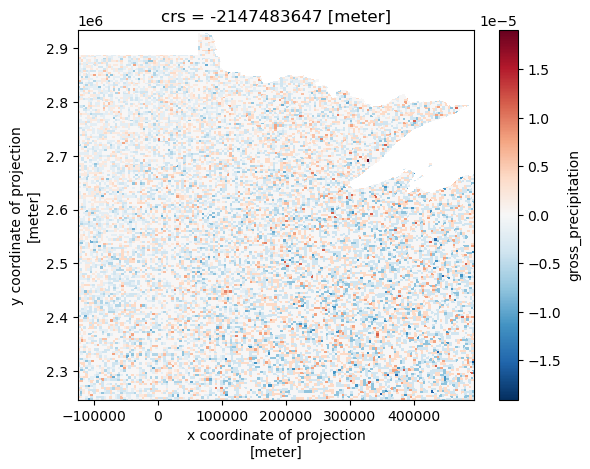

In [18]:
diff_swbstats_bcc = bcc_mean_annual_sum['gross_precipitation'] - bcc_swbstats_mean_annual_sum['gross_precipitation']
diff_swbstats_bcc.plot()

### Difference over the period 1995-2014

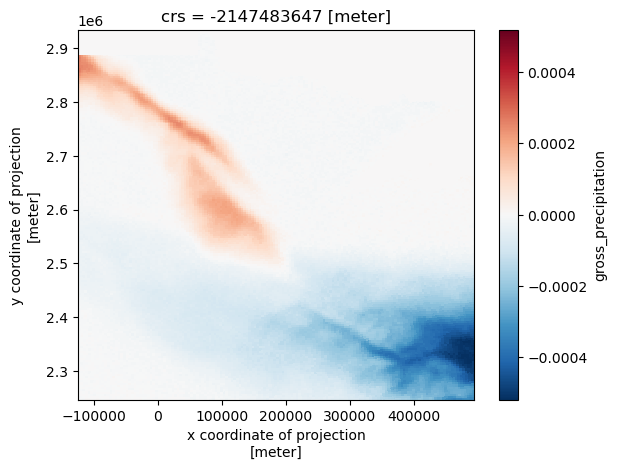

In [22]:
diff_cnrm_bcc = cnrm_mean_annual_sum['gross_precipitation']  - bcc_mean_annual_sum['gross_precipitation'] 
diff_cnrm_bcc.plot()

### Difference over the period 1997-2012

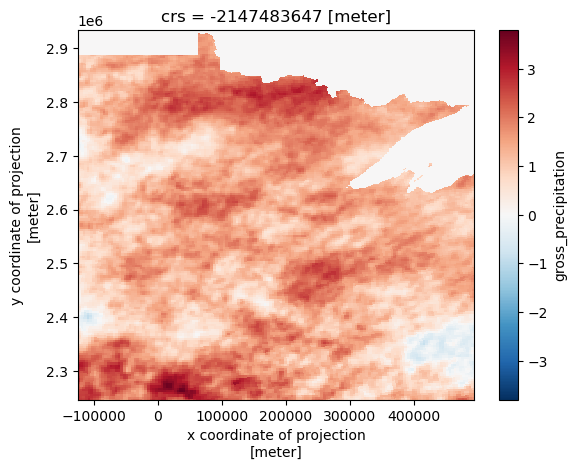

In [24]:
diff_cnrm_bcc_partial = cnrm_mean_annual_sum_partial['gross_precipitation']  - bcc_mean_annual_sum_partial['gross_precipitation'] 
diff_cnrm_bcc_partial.plot()

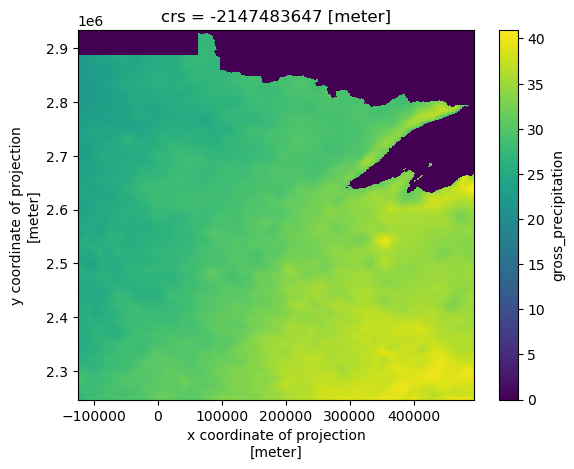

In [13]:
cnrm_mean_annual_sum['gross_precipitation'].plot()

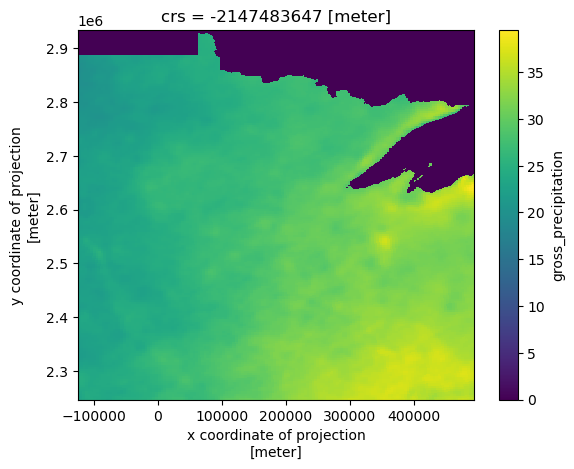

In [15]:
bcc_mean_annual_sum['gross_precipitation'].plot()